# CPI Project


### Products, services and their weightd are decided.

$$0.1(Transportation)+ 0.1(Cereal)+ 0.2(Gas)+ 0.1(Recreation)+ 0.1(Alcoholic beverages)+ 0.1(Rent)+ 0.1(Electricity)+ 0.2(Apparel)$$

+ `Transportation`- includes all students commute and busing for personal and academic reseaons
+ `Cereal`- breakfast staple common in many students diet
+ `Gas`- necessary for transportation to and from class, appointments and jobs and price is highly variable and location based
+ `Recreation`- inevitable for a fulfilling social life
+ `Alcoholic beverages`- Prominent on college campuses
+ `Rent`- most college students rent apartments and dont own/ pay mortgages
+ `Electricity`- major utility needed to charge all devices fro school
+ `Apparel`- a necessity that every person needs

###  The locations where these prices are measured


 $$0.33(North East)+ 0.33(Midwest)+ 0.34(South)$$

### Combining the choices of items and locations, find all the series names. 
assign a wight for each series that combines the weights that you chose for the items
and the weights you chose for the locations.

+ `Northeast` (0100)
    + CUUR0100SAF111 : Cereal
    + CUUR0100SETB01 : Gas (regular)
    + CUUR0100SAF116 : Alcoholic Beverages
    + CUUR0100HF011 : Electricity
    + CUUR0100SAR : Recreation
    
    + CUUR0100SAS2RS  : Rent
    + CUUR0100SAT : Transportation
    + CUUR0100SAA : Apparel

+ `Midwest` (0200)
    + CUUR0200SAF111 : Cereal
    + CUUR0200SETB01 : Gas (regular)
    + CUUR0200SAF116 : Alcoholic Beverages
    + CUUR0200SEHF01 : Electricity
    + CUUR0200SAR : Recreation
    + CUUR0200SAS2RS  : Rent
    + CUUR0200SAT : Transportation
    + CUUR0200SAA : Apparel

+ `South` (0300)
    + CUUR0300SAF111 : Cereal
    + CUUR0300SETB01 : Gas (regular)
    + CUUR0300SAF116 : Alcoholic Beverages
    + CUUR0300SEHF01 : Electricity
    + CUUR0300SAR : Recreation
    + CUUR0300SAS2RS  : Rent
    + CUUR0300SAT : Transportation
    + CUUR0300SAA : Apparel

###  State the final basket and the weights for each item in the basket

| Transportation S. (CUUR0300SAT)  | Cereal S. (CUUR0300SAF111) | Gas S. (CUUR0300SETB01) | Recreation s. (CUUR0300SAR) | Alcoholic Beverages S. (CUUR0300SAF116) | Rent S. (CUUR0300SAS2RS)| Electricity S. (CUUR0300SEHF01) | Apparel S. (CUUR0300SAA) | Transportation MW. (CUUR0200SAT) | Cereal MW. (CUUR0200SAF111) | Gas MW. (CUUR0200SETB01) | Recreation MW. (CUUR0200SAR) | Alcoholic Beverages MW. (CUUR0200SAF116)| Rent MW. (CUUR0200SAS2RS) | Electricity MW. (CUUR0200SEHF01) | Apparel MW. (CUUR0200SAA)| Transportation NE. (CUUR0100SAT) | Cereal NE. (CUUR0100SAF111)| Gas NE. (CUUR0100SETB01) | Recreation NE. (CUUR0100SAR ) | Alcoholic Beverages NE. (CUUR0100SAF116) | Rent NE. (CUUR0100SAS2RS) | Electricity NE. (CUUR0100SEHF01) | Apparel NE. (CUUR0100SAA) |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| .034 | .034 | .068 | .034 | .034 | .034 | .034 | .068 | .033 | .033 | .066 | .033 | .033 | .033 | .033 | .066 | .033 | .033 | .066 | .033 | .033 | .033 | .033 | .066 |

| Northeast | Midwest | South |
| --- | --- | --- |
| .33 | .33 | .34 |

+ Northeast, midwest, south give a more robust breakdown of US cpi by including major sectors of the country 

### Make an API call to download the data for the basket created. 
Use data for the last 5 years: January 2017 to January 2022.
Include the general CPI (CUUR0000SA0) in API call (for compari-
son with our CPI)

In [1]:
import requests
import json
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%run APIkeys.py
key = os.environ["BLS_API_key"]

In [3]:
def multiSeriesV4(varList,myKey,first='2018',last='2023'):
    # Input: varList = a list of strings containing the series names
    # Input: myKey =  a string containing your BLS API key
    # Output: new_df = a data frame containing the data collected
    
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  #this will not change
    headers = {'Content-type': 'application/json'}  #This will not changed !

    parameters = {
        "seriesid":varList,
        "startyear":first, 
        "endyear":last,
        "catalog":True, 
        "calculations":False, 
        "annualaverage":False,
        "aspects":False,
        "registrationkey": myKey 
     }

    data = json.dumps(parameters) #this converts the Python dictionary into a JSON format
    
    p = requests.post(base_url, data=data, headers=headers)
    json_data = json.loads(p.text)
    
    n = len(varList) #number of series requested
    
    new_df = pd.DataFrame(columns=['year', 'period'])
    for item in range(n):
        l = len(json_data['Results']['series'][item]['data']) #length of the list
        if l == 0:
            print('Series ',varList[item],' does not exist')
        else:
            
            print('Series ',varList[item],' exists with ',l,' observations')
            d = json_data['Results']['series'][item]['data']
            current_df = pd.DataFrame(data=d)
            current_df = current_df[['year','period','value']].astype({'value': 'float64'})
            current_df = current_df.rename(columns = {'value':varList[item]}) 
            
            new_df = new_df.merge(current_df, on = ['year','period'],how='outer')
    
    return new_df

In [4]:
# Specify our basket from consumer products above
basket = ["CUUR0000SA0","CUUR0300SAF111", "CUUR0300SETB01" , "CUUR0300SAF116", "CUUR0300SEHF01", "CUUR0300SAR", "CUUR0300SAS2RS",  "CUUR0300SAT", "CUUR0300SAA","CUUR0200SAF111", "CUUR0200SETB01" , "CUUR0200SAF116", "CUUR0200SEHF01", "CUUR0200SAR", "CUUR0200SAS2RS",  "CUUR0200SAT", "CUUR0200SAA","CUUR0100SAF111", "CUUR0100SETB01" , "CUUR0100SAF116", "CUUR0100SEHF01", "CUUR0100SAR", "CUUR0100SAS2RS",  "CUUR0100SAT", "CUUR0100SAA"]

In [5]:
# Use our function to create our data with our products for the cpi
myData = multiSeriesV4(basket,key)

Series  CUUR0000SA0  exists with  72  observations
Series  CUUR0300SAF111  exists with  72  observations
Series  CUUR0300SETB01  exists with  72  observations
Series  CUUR0300SAF116  exists with  72  observations
Series  CUUR0300SEHF01  exists with  72  observations
Series  CUUR0300SAR  exists with  72  observations
Series  CUUR0300SAS2RS  exists with  72  observations
Series  CUUR0300SAT  exists with  72  observations
Series  CUUR0300SAA  exists with  72  observations
Series  CUUR0200SAF111  exists with  72  observations
Series  CUUR0200SETB01  exists with  72  observations
Series  CUUR0200SAF116  exists with  72  observations
Series  CUUR0200SEHF01  exists with  72  observations
Series  CUUR0200SAR  exists with  72  observations
Series  CUUR0200SAS2RS  exists with  72  observations
Series  CUUR0200SAT  exists with  72  observations
Series  CUUR0200SAA  exists with  72  observations
Series  CUUR0100SAF111  exists with  72  observations
Series  CUUR0100SETB01  exists with  72  observat

## Compute our version of the CPI based on the weights

In [6]:
# Using the values from our table (including weight for locations)
myData["myCPI"] = 0.034*myData["CUUR0300SAT"] + 0.068*myData["CUUR0300SETB01"]+0.034*myData["CUUR0300SAF111"] +0.034*myData["CUUR0300SAR"] +0.034*myData["CUUR0300SAF116"] +0.034*myData["CUUR0300SAS2RS"] +0.034*myData["CUUR0300SEHF01"] + 0.068*myData["CUUR0300SAA"]+0.034*myData["CUUR0200SAT"] + 0.068*myData["CUUR0200SETB01"]+0.034*myData["CUUR0200SAF111"] +0.034*myData["CUUR0200SAR"] +0.034*myData["CUUR0200SAF116"] +0.034*myData["CUUR0200SAS2RS"] +0.034*myData["CUUR0200SEHF01"] + 0.068*myData["CUUR0200SAA"]+0.034*myData["CUUR0200SAT"] + 0.068*myData["CUUR0200SETB01"]+0.034*myData["CUUR0200SAF111"] +0.034*myData["CUUR0200SAR"] +0.034*myData["CUUR0200SAF116"] +0.034*myData["CUUR0200SAS2RS"] +0.034*myData["CUUR0200SEHF01"] + 0.068*myData["CUUR0200SAA"]

In [7]:
# Sort by year and period
myData.sort_values(by=['year','period'],inplace=True,ascending=False)
myData

,year,period,CUUR0000SA0,CUUR0300SAF111,CUUR0300SETB01,CUUR0300SAF116,CUUR0300SEHF01,CUUR0300SAR,CUUR0300SAS2RS,CUUR0300SAT,...,CUUR0200SAA,CUUR0100SAF111,CUUR0100SETB01,CUUR0100SAF116,CUUR0100SEHF01,CUUR0100SAR,CUUR0100SAS2RS,CUUR0100SAT,CUUR0100SAA,myCPI
0,2023,M12,306.746,361.553,253.841,265.499,238.439,136.841,367.209,264.898,...,115.486,382.875,284.588,295.183,260.114,141.161,442.345,257.472,127.171,242.759626
1,2023,M11,307.051,363.812,263.630,265.207,234.091,136.730,366.045,267.438,...,117.167,388.714,298.096,295.374,263.322,140.427,439.439,261.067,128.189,247.452578
2,2023,M10,307.671,362.899,284.355,265.479,236.513,136.498,364.809,269.936,...,122.189,386.634,312.856,294.792,256.473,141.088,437.724,263.135,135.288,252.337460
3,2023,M09,307.789,363.868,307.769,264.778,239.684,136.300,363.774,273.572,...,123.293,386.251,321.733,293.809,263.300,139.950,436.555,263.247,136.951,258.801812
4,2023,M08,307.026,363.566,315.327,263.807,236.616,135.463,361.445,276.864,...,121.385,387.495,321.226,293.065,264.393,139.616,433.512,264.568,135.581,258.892762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2018,M05,251.588,276.967,241.430,230.980,186.306,117.420,280.587,214.664,...,118.603,291.749,251.143,253.731,209.697,123.315,366.179,210.975,133.571,211.312924
68,2018,M04,250.546,275.534,229.172,232.539,185.473,117.716,279.908,211.814,...,119.830,293.366,236.049,253.071,201.559,124.184,364.435,207.639,133.247,207.459976
69,2018,M03,249.554,275.995,215.297,232.296,186.537,118.209,279.027,208.913,...,120.121,294.079,223.792,253.216,205.089,123.949,363.276,205.091,130.835,204.559334
70,2018,M02,248.991,276.276,217.679,231.864,188.321,118.011,278.005,208.883,...,119.680,291.898,228.647,253.896,203.693,124.211,361.507,205.849,131.169,204.004964


## Compute the 12-month inflation for several lags based on our CPI
+ compare it with inflation based on the general CPI. Compare and discuss
the results.
+ Put both on one graph and make sure the two lines are clearly
labeled as well as the axes.

In [8]:
# Extract your cpi column from dataframe
cpi = myData["CUUR0000SA0"]
mycpi = myData["myCPI"] # two main columns we want to become variables

In [9]:
def myinflation(lag):
    # This function computes the percent change in the level of myCPI (inflation) for the 
    # 12 months starting '12+lag' months ago and ending 'lag' months ago.
    # lag is an integer input
    
    new = mycpi[lag]
    old = mycpi[12+lag]
    
    change = (new/old - 1)*100
    
    return change

In [10]:
def generalinflation(lag):
    # This function computes the percent change in the level of general CPI (inflation) for the 
    # 12 months starting '12+lag' months ago and ending 'lag' months ago.
    # lag is an integer input
    
    new = cpi[lag]
    old = cpi[12+lag]
    
    change = (new/old - 1)*100
    
    return change

In [11]:
# Find number of observations
obs = mycpi.shape[0] - 12 
print(f"There are {obs} months in our inflation data")

There are 60 months in our inflation data


In [12]:
# Confirm type of temp
temp = map(myinflation,range(obs))
type(temp)

map

In [37]:
# Create line data for my cpi to graph
myInflation = list(map(myinflation,range(obs)))


In [38]:
# Create lag data to use for axis
lags = list(range(obs))

lags = list(map(str,lags))

In [39]:
# Create line data for general inflation to graph

Inflation = list(map(generalinflation,range(obs)))


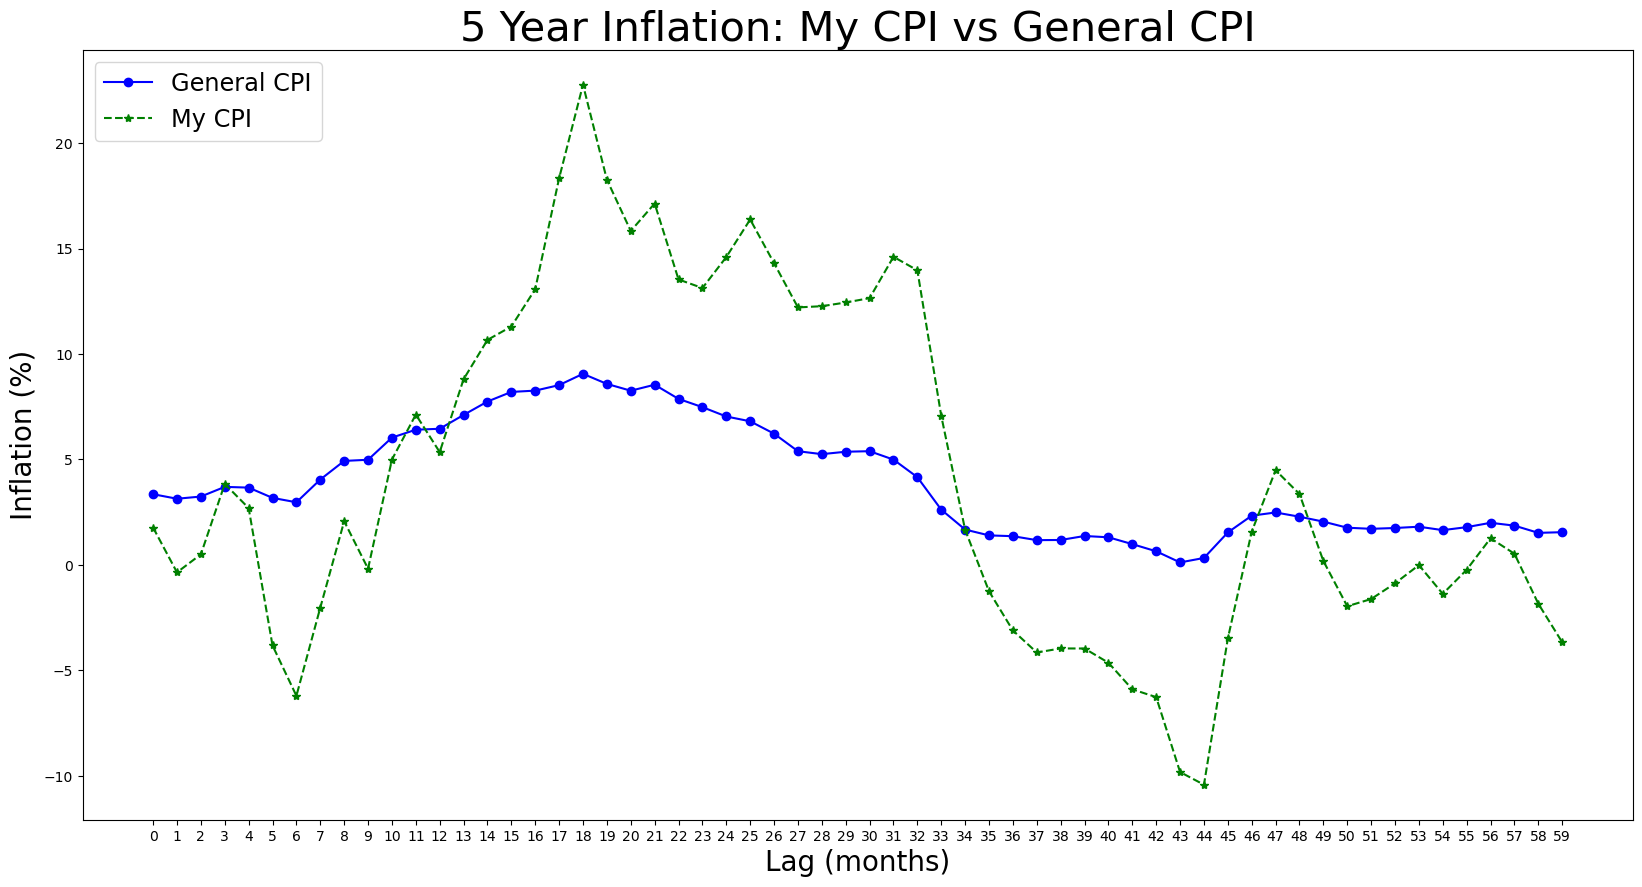

In [46]:
# Create plot for general and my inflation over number of lag months
plt.figure(figsize = (20,10))

plt.plot(lags,Inflation, color='blue', marker='o', linestyle='solid', label = "General CPI")
plt.plot(lags,myInflation, color='green', marker='*', linestyle='dashed', label = "My CPI")
plt.legend(loc = 'upper left',fontsize="xx-large")
plt.title("5 Year Inflation: My CPI vs General CPI",fontsize = 30)
plt.xlabel("Lag (months)",fontsize = 20)
plt.ylabel("Inflation (%)",fontsize = 20)
plt.show()

In [39]:
# Create table comparing my inflation to general inflation at 3 lag points

General=pd.DataFrame([generalinflation(0),generalinflation(6),generalinflation(12),generalinflation(36)])
My=pd.DataFrame([myinflation(0),myinflation(6),myinflation(12), myinflation(36)])
Inflat= pd.concat([General, My],axis=1)
Inflat.columns=['General Inflation', "My Inflation"]
Inflat.index=["0 Month Lag", "6 Month Lag", "12 Month Lag", "36 Month Lag"]
Inflat.T


,0 Month Lag,6 Month Lag,12 Month Lag,36 Month Lag
General Inflation,3.352123,2.969178,6.454401,1.362005
My Inflation,1.769466,-6.206836,5.348174,-3.107534


While this CPI isn't as resistant to fluctuations (less robust) as the much larger general CPI, as expected because it is much smaller and, therefore, less diverse, it still captures the overall trend of the general inflation.  It appears that standard consumer products integral to college students' lives are more sensitive to inflation, such as gas, recreation, and rent (especially on college campuses).  This could also contribute to the volatility of their CPI compared to the general.